AI Resume Classifiers System

In [1]:
import pandas as pd
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [2]:
df.shape

(962, 2)

In [3]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Category    0
Resume      0
dtype: int64


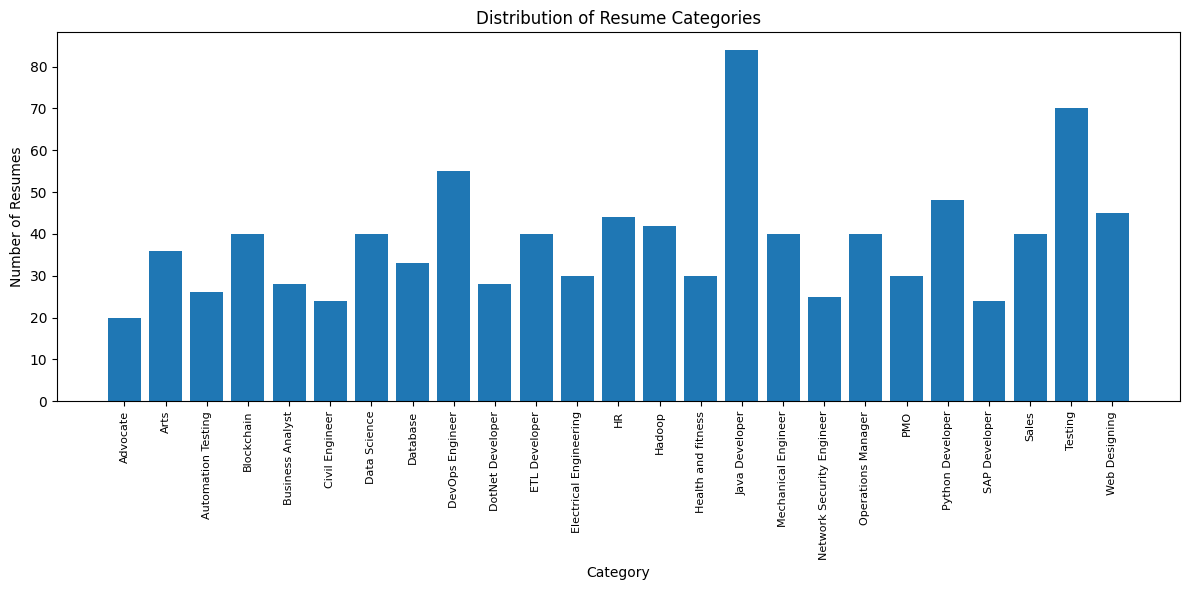

In [4]:
import matplotlib.pyplot as plt

category_counts = df['Category'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Number of Resumes')
plt.xlabel('Category')
plt.title('Distribution of Resume Categories')
plt.tight_layout()
plt.show()

In [5]:
#Implementing preprocessiong for the csv
import re
import nltk 
from nltk.corpus import stopwords
import spacy

stop_words = set(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
      # a) Lowercase
    text = text.lower()
    # b) Remove URLs and email addresses
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)
    text = re.sub(r'\S+@\S+', ' ', text)
    # c) Remove non-alphabetic characters (keep spaces)
    text = re.sub(r'[^a-z\s]', ' ', text)
    # d) Tokenize using spaCy
    doc = nlp(text)
    tokens = []
    for token in doc:
        lemma = token.lemma_.strip()
        # e) Filter out tokens that are stop words or single-character
        if lemma not in stop_words and len(lemma) > 1:
            tokens.append(lemma)
    
    # f) Rejoin tokens into a single string
    return ' '.join(tokens)

 

In [6]:
df['Cleaned_Resume'] = df['Resume'].apply(preprocess_text)

print(df[['Resume', 'Cleaned_Resume']].head(10))

                                              Resume  \
0  Skills * Programming Languages: Python (pandas...   
1  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Areas of Interest Deep Learning, Control Syste...   
3  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Education Details \r\n MCA   YMCAUST,  Faridab...   
5  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...   
6  Skills â¢ Python â¢ Tableau â¢ Data Visuali...   
7  Education Details \r\n B.Tech   Rayat and Bahr...   
8  Personal Skills â¢ Ability to quickly grasp t...   
9  Expertise â Data and Quantitative Analysis â...   

                                      Cleaned_Resume  
0  skill programming language python panda numpy ...  
1  education detail may may uit rgpv data scienti...  
2  area interest deep learning control system des...  
3  skill python sap hana tableau sap hana sql sap...  
4  education detail mca ymcaust faridabad haryana...  
5  skill basic iot python matlab data science mac... 

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1) Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,       # Only keep top 5,000 features (words) by TF-IDF weight
    ngram_range=(1,2),       # Unigrams and bigrams (e.g., "data", "machine learning")
    stop_words='english'     # We already removed stop words, but sklearn can also filter common English stop words
)

# 2) Fit vectorizer on the cleaned resume text and transform
X_tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Resume'])

# 3) Extract labels (categories)
y = df['Category']  # e.g., "Data Science", "Marketing"

# 4) Check TF-IDF shape
print("TF-IDF matrix shape:", X_tfidf.shape)

TF-IDF matrix shape: (962, 5000)


In [8]:
from sklearn.model_selection import train_test_split

# Split 80% train, 20% test; stratify ensures each category proportion is maintained
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



--- Training Linear SVM ---
Accuracy: 0.9948

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00  

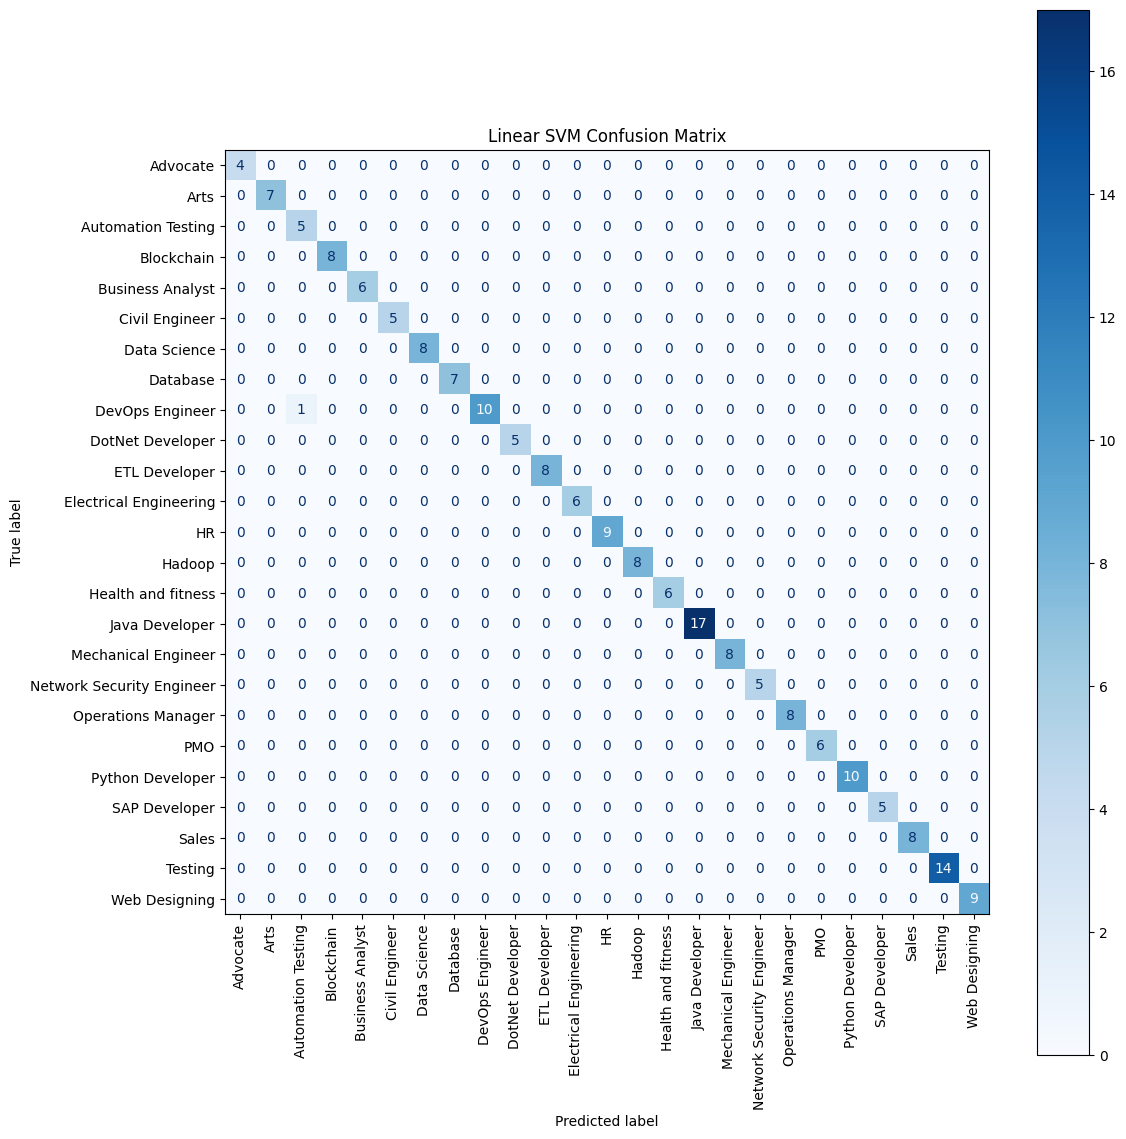


--- Training Naive Bayes ---
Accuracy: 0.9741

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      0.50      0.67         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       1.00      0.60      0.75         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00 

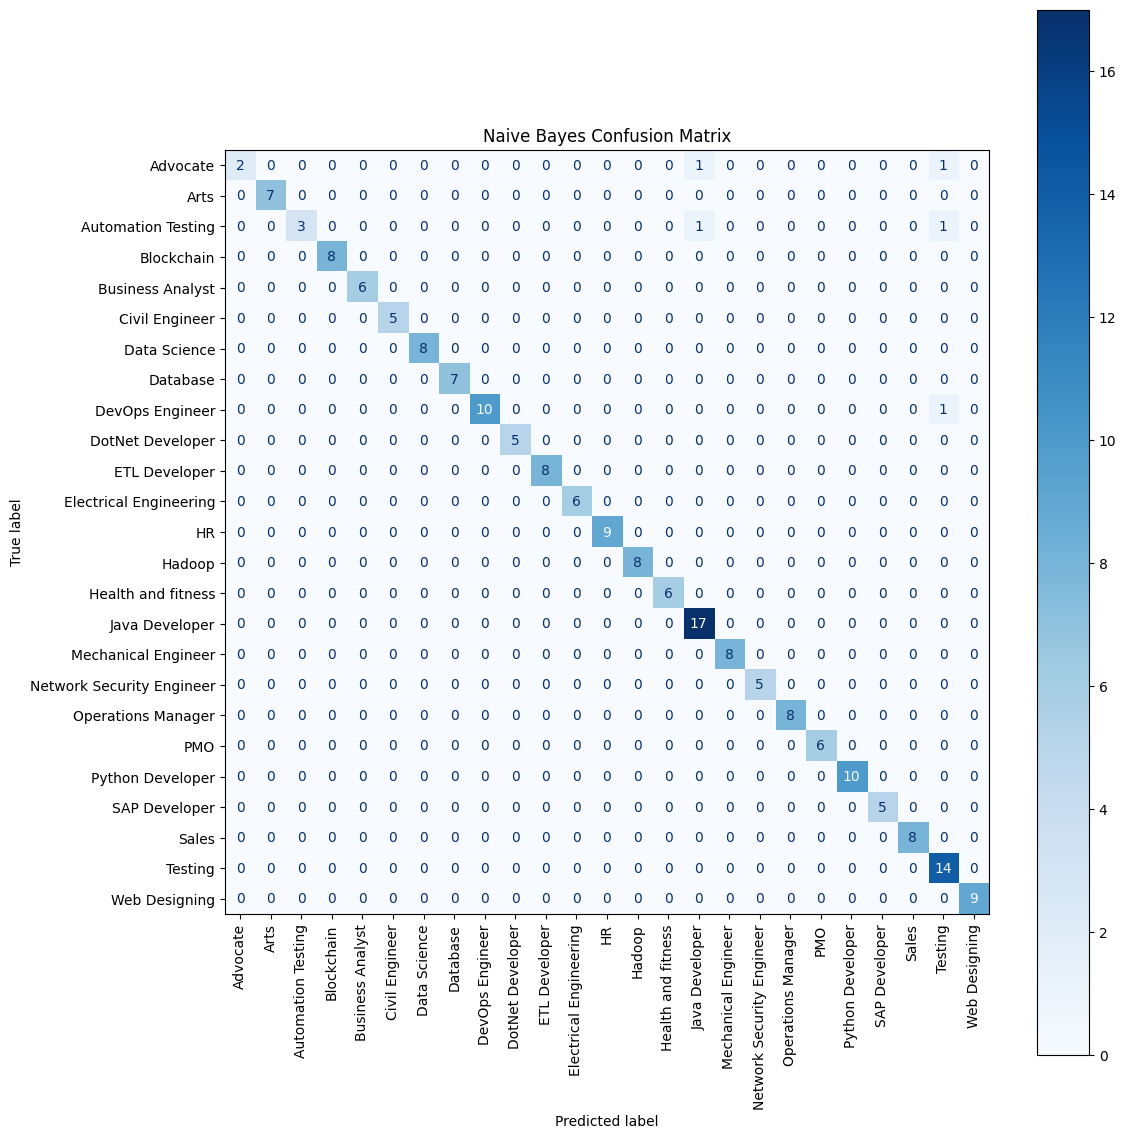

In [9]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.naive_bayes import MultinomialNB

models = {
    "Linear SVM": LinearSVC(max_iter=2000, C=1.0, class_weight='balanced'),
    "Naive Bayes": MultinomialNB()
}

results = {}

for model_name, model in models.items():
    print(f"\n--- Training {model_name} ---")
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {'accuracy': accuracy, 'model': model}
    
    print(f"Accuracy: {accuracy:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    labels = sorted(y_test.unique())
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    
    fig, ax = plt.subplots(figsize=(12, 12))
    disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation=90, colorbar=True)
    ax.set_title(f"{model_name} Confusion Matrix")
    plt.tight_layout()
    plt.show()



In [10]:
# Determine the best model based on accuracy
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\nBest performing model is {best_model_name} with an accuracy of {results[best_model_name]['accuracy']:.4f}")



Best performing model is Linear SVM with an accuracy of 0.9948


In [11]:
import joblib
# Save the vectorizer and the best model
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')
joblib.dump(best_model, 'resume_classifier_model.joblib')

print("\nSaved tfidf_vectorizer.joblib and resume_classifier_model.joblib")


Saved tfidf_vectorizer.joblib and resume_classifier_model.joblib
